<a href="https://colab.research.google.com/github/e-stan/image_generator/blob/master/train_model_gan_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from dataset_helper import *
from imageGAN import *
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
zipfile.ZipFile("/content/drive/MyDrive/artdive/data/skyline_images.zip", 'r').extractall("data/")

In [4]:
names = ["data/skyline_images/" + x for x in os.listdir("data/skyline_images/") if ".jpg" in x][:1000]
#names = cleanImageFiles(names)

In [5]:
dim = (256,256,3)
batchsize=64
epochs = 10
latentDim = 100
stride = 2
arch = [32,32,16,16,8]
arch_desc = [16,32,64,32,32]



In [6]:
gan = ImageGAN(dim,arch,arch_desc,batchsize,latent_size=latentDim,stride=stride)

gan.compile(optimizer=keras.optimizers.Adam(),run_eagerly=True)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              206848    
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        9216      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        9216      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 16)        4608      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 16)      23

In [7]:
#data = getTrainingTensor(names,dim)
#data = tf.data.Dataset.from_tensor_slices(data).batch(batchsize)
#data = np.load("data_tensor.npy")
#np.save("../data/skyline_images/data_tensor.npy",data)
data = getImageGenerator("data/","skyline_images", dim, batchsize)

Found 123121 images belonging to 1 classes.


In [ ]:
if __name__ == "__main__":
    gan.fit(data, epochs=epochs,batch_size=batchsize)
    gan.save_weights("/content/drive/MyDrive/artdive/models/skyline_gan_1")






Epoch 1/10
 914/1924 [=============>................] - ETA: 3:24 - loss: 3.1777

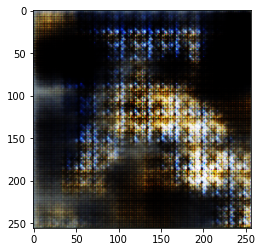

In [17]:
plt.imshow(gan.generate_images()[0])